# keras $f_{\text{Mixture Model}}(x)$

### Accessing GitHub with git (on Mac)
- AKA how I published this file so you can access it with google collab
1. https://brew.sh
     - `/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install.sh)"`
2. https://git-scm.com/download/mac
    - `brew install git`
3. https://docs.github.com/en/free-pro-team@latest/github/authenticating-to-github/connecting-to-github-with-ssh
    - `ssh-keygen -t rsa -b 4096 -C "iam.scottschwartz@gmail.com"`
    - `ls -al ~/.ssh`
    - pbcopy < ~/.ssh/id_rsa.pub
    - <github/settings/SSH and GPG Keys/New SSH key><ctrl-v: paste key><name it><save>
    - `git clone git@github.com:pointOfive/sixty_sixteen.git`
    - `git add/git commit -m ''/git push

### updating local environment
- make sure you've done `conda activate evn_you_want`

In [1]:
! conda list

# packages in environment at /Users/gck8gd/opt/anaconda3/envs/deep_learning_6018:
#
# Name                    Version                   Build  Channel
appnope                   0.1.0           py38h32f6830_1001    conda-forge
argon2-cffi               20.1.0           py38h4d0b108_1    conda-forge
async_generator           1.10                       py_0    conda-forge
attrs                     20.2.0             pyh9f0ad1d_0    conda-forge
backcall                  0.2.0              pyh9f0ad1d_0    conda-forge
backports                 1.0                        py_2    conda-forge
backports.functools_lru_cache 1.6.1                      py_0    conda-forge
blas                      1.0                         mkl  
bleach                    3.2.1              pyh9f0ad1d_0    conda-forge
brotlipy                  0.7.0           py38h4d0b108_1000    conda-forge
ca-certificates           2020.6.20            hecda079_0    conda-forge
certifi                   2020.6.20        py38h32f

In [2]:
# https://www.tensorflow.org/install
! pip install tensorflow

     |████████████████████████████████| 165.2 MB 577 kB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 587 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 492 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 658 kB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 681 kB/s eta 0:00:01
     |████████████████████████████████| 127 kB 579 kB/s eta 0:00:01
     |████████████████████████████████| 15.1 MB 680 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 698 kB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 589 kB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 574 kB/s eta 0:00:01
     |████████████████████████████████| 459 kB 593 kB/s eta 0:00:01
     |████████████████████████████████| 114 kB 575 kB/s eta 0:00:01
     |████████████████████████████████| 779 kB 536 kB/s eta 0:00:01
     |████████████████████████████████| 95 kB 698 kB/s eta 0:00:01
     |████████████████████████████████| 298 kB 46

In [107]:
# https://www.tensorflow.org/probability/install
! pip install --upgrade tensorflow-probability

     |████████████████████████████████| 4.3 MB 705 kB/s eta 0:00:01
     |████████████████████████████████| 95 kB 638 kB/s eta 0:00:01


In [130]:
# https://plotly.com/python/getting-started/
! yes y | conda install -c plotly plotly=4.12.0

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.5
  latest version: 4.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/gck8gd/opt/anaconda3/envs/deep_learning_6018

  added / updated specs:
    - plotly=4.12.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         121 KB
    plotly-4.12.0              |             py_0         5.9 MB  plotly
    retrying-1.3.3             |             py_2          14 KB
    ------------------------------------------------------------
                                           Total:         6.0 MB

The following NEW packages will be INSTALLED:

  plotly             plotly/noarch::plotly-4.12.0-py_0
  retrying           pkgs/main/noarch::retrying-1.3.3-py_2

The foll

# Imports

In [1]:
# https://keras.io/getting_started/intro_to_keras_for_engineers/
# https://www.tensorflow.org/probability/overview

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_probability as tfp
tfd = tfp.distributions

import numpy as np
from scipy import stats

#import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Synthetic Data

In [2]:

# Making a tree component mixture which is a function of a single constant x
# depending on the value of x, there's 3 possible distributions sampled from
# each having a different number of data point contributions (i.e., mixture weights) 
# and a different location in 3d space (as a function of x)
# but sharing an increasing and increasingly correlated covariance structure
# (which is also a function of the single constat x).

# Note that while there is a local consistancy/smoothness behavior to this model,
# in data space, learning about the covariance structure in one part of the space
# informs the covariance structure in another part of the space... so we have
# non-local learning in the 3d data space!

n_1 = 1000
x_1 = stats.uniform(0,10).rvs(n_1)
n_2 = 200
x_2 = stats.uniform(0,10).rvs(n_2)
n_3 = 50
x_3 = stats.uniform(0,10).rvs(n_3)

b = 1
mu_1 = [[x+b,-b,-b] for x in x_1]
mu_2 = [[-b,x,-b] for x in x_2]
mu_3 = [[-b,-b,x] for x in x_3]

# Taking inspiration from the LKJ prior
# https://mc-stan.org/docs/2_24/functions-reference/lkj-correlation.html
cov_1 = [np.diag(3*[np.max(mu)**2]) + np.max(mu)**2.5*np.ones((3,3)) for mu in mu_1]
cov_2 = [np.diag(3*[np.max(mu)**2]) + np.max(mu)**2.5*np.ones((3,3)) for mu in mu_2]
cov_3 = [np.diag(3*[np.max(mu)**2]) + np.max(mu)**2.5*np.ones((3,3)) for mu in mu_3]



### TFP: TensorFlow Probability

In [3]:
# https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/MultivariateNormalFullCovariance

scale=0.1
mvn_1 = tfd.MultivariateNormalTriL(loc=mu_1, 
                                   scale_tril=scale*tf.linalg.cholesky(cov_1))
mvn_2 = tfd.MultivariateNormalTriL(loc=mu_2, 
                                   scale_tril=scale*tf.linalg.cholesky(cov_2))
mvn_3 = tfd.MultivariateNormalTriL(loc=mu_3, 
                                   scale_tril=scale*tf.linalg.cholesky(cov_3))

mm = np.row_stack([mvn_1.sample().numpy(),
                   mvn_2.sample().numpy(),
                   mvn_3.sample().numpy()])

df = pd.DataFrame(mm, columns=['y1','y2','y3'])
df.head()

,y1,y2,y3
0,6.004300,-0.843997,-0.736915
1,9.383149,-2.571744,-2.146859
2,4.026837,-1.607397,-0.809741
3,3.752921,-1.308247,-1.207353
4,4.979869,-0.488500,-0.367888


### Plotly

In [101]:
# https://plotly.com/python/3d-scatter-plots/
# https://community.plotly.com/t/setting-marker-size-gives-a-white-outline-in-3d-scatter/26901/4

fig = go.Figure(data=[go.Scatter3d(x=df.y1, y=df.y2, z=df.y3,
                                   mode='markers', marker=dict(size=2))])
fig.show()

# Mixture Model

$f(x) = \sum_{j=1}^3 \mathbf{g}(x)_{j} \frac{|\Sigma_{h(x)}|^{-\frac{1}{2}}}{\sqrt{2\pi}^3} e^{-\frac{1}{2}\left(\mathbf{y}-\mu_{f_{j}(x)}\right)^T \Sigma_{h(x)}^{-1}\left(\mathbf{y}-\mu_{f_{j}(x)}\right)}$

- $\mu_{f_{j}(x)}$: affine function (single layer, identity activation)
- $\mathbf{g}(x)$: softmax activation function (single layer), for weights
- $\Sigma_{h(x)}$: sequential layers leading to 3 softplus and 3 identity activations parameterizing a Cholesky decomposition of the covariance matrix:

$$ \Sigma = LL^T, \quad L = \left[\begin{array}{ccc}
\mathbb{R}_+ & 0 & 0\\
\mathbb{R} & \mathbb{R}_+ & 0\\
\mathbb{R} & \mathbb{R} & \mathbb{R}_+\\
\end{array}\right]$$

- Note that we could also use an unconstrained factorization of the covariance matrix $\Sigma(x) = B(x)B(x)^T$ (where $B(x)$ is unconstrained) if we didn't want to be careful with ensuring positive definiteness through positive diagonals in $L$. 



### Notes: output units as parameters for distributions

- The final output of our FF network will be a mixture distribution; however
    - unlike, e.g., `sigmoid` where a sigmoid output *IS* a distribution
- the final output of our FF network will actually be *parameters*, *parameterizing* the distribution 
    - and then we'll just wrap the distribution around the parameters!

$$p(y|f(\mathbf{x};\boldsymbol{\theta}))$$

- The gradients (of the parameters) of the log likelihood of a (heterskedastic, or otherwise) multivariate normal mixture model only involve log, multiplication and addition 
    - all of which are well-behaved with respect to gradient calculations
        - e.g., cross-entropy of $\sqrt{\frac{f_\phi(x)}{2\pi}} e^{-\frac{f_\phi(x)}{2}(y-f_\mu(x))^2}$ is proportional to $log(f_\beta(x)) + f_\phi(x)(y-f_\mu(x))^2$
            - (though note that we have parameterized $\phi(x)$ rather than $\sigma^2(x)$ to avoid a division, and parameterizing by $\sigma(x)$ would be *even* worse because the gradient vanishes quicker when squaring, making it more difficult to learn parameters that are squared)
        - e.g., the determinant of a *diagonal* covariance matrix $\Sigma_{h(x)}$ is product of diagonals; otherwise it's the product of its eigenvalues of $\Sigma_{h(x)}$
            - Note here, however, that using a non-diagonal $\Sigma_{h(x)}$ requires $O(n^3)$ computation for the for determinant, eigen decomposition, and inverse of $\Sigma$ (or it's *Cholesky* ($L$) or unconstrained ($B$) factorized parameterization)
        - Regardless... covariance matrix must stay PD: eigenvalues of preicison matrix are inverse of those of covariance matrix... so eigenvalues of preicison matrix must be positive.
    - we have used a softplus activation on an affine function to ensure our *Cholesky* decomposition has a positive diagonal (and hence produces a positive definite covaraince matrix).
  
       

### Affine function
$ \mathbf{W}^T\mathbf{x}+\mathbf{c} $

In [252]:
p = 1 # feature space dimension
n = 2 # 2 samples for the example
x = np.ones((p,n))
x

array([[1., 1.]])

In [253]:
# (p,n)
x.shape

(1, 2)

In [254]:
number_components = 3
component_dimensions = 3
width = number_components*component_dimensions
W = np.arange(x.shape[0]*width).reshape(x.shape[0],width)
W

array([[0, 1, 2, 3, 4, 5, 6, 7, 8]])

In [255]:
# (p, width)
W.shape

(1, 9)

In [256]:
c = np.ones((width, 1))
c

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [257]:
# (width, 1)
c.shape

(9, 1)

In [258]:
t = np.transpose
t(W)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

### Identity activation function: means
- $f(\mathbf{W}^T\mathbf{x}+\mathbf{c}) = \mathbf{W}^T\mathbf{x}+\mathbf{c} $

In [266]:
means = t(W) @ x + c
means.reshape(number_components,component_dimensions,n)

array([[[1., 1.],
        [2., 2.],
        [3., 3.]],

       [[4., 4.],
        [5., 5.],
        [6., 6.]],

       [[7., 7.],
        [8., 8.],
        [9., 9.]]])

### Softmax activation function: class probabilities

$f(z)_i = \frac{exp(z_i)}{\sum_i exp(z_i)}$

In [283]:
width_p = number_components
W_p = np.arange(x.shape[0]*width_p).reshape(x.shape[0], width_p)
c_p = np.ones((width_p, 1))
W_p, c_p

(array([[0, 1, 2]]),
 array([[1.],
        [1.],
        [1.]]))

In [284]:
W_b.shape, c_p.shape

((1, 3), (3, 1))

In [290]:
t(W_p) @ x + c_p

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [299]:
tf.nn.softmax(t(W_p) @ x + c_p, axis=0)#.numpy().sum(axis=0)

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[0.09003057, 0.09003057],
       [0.24472847, 0.24472847],
       [0.66524096, 0.66524096]])>

### softplus: positive lower triangule 
$f(z)_i = exp(1 + z_i) $

In [305]:
# Cholesky decomposition of a covariance (symmetric, positive definite matrix) matrix
# has positives along the diagonals
# https://mc-stan.org/docs/2_24/reference-manual/covariance-matrices.html

# positive or negative lower off-diagonal elements
width_l = number_components
W_l = np.arange(x.shape[0]*width_l).reshape(x.shape[0], width_l)
c_l = np.ones((width_l, 1))
W_l, c_l

# positive diagonal elements
width_d = number_components
W_d = np.arange(x.shape[0]*width_d).reshape(x.shape[0], width_d)
c_d = np.ones((width_d, 1))
W_d, c_d


(array([[0, 1, 2]]),
 array([[1.],
        [1.],
        [1.]]))

In [306]:
W_d.shape, c_d.shape, W_l.shape, c_l.shape

((1, 3), (3, 1), (1, 3), (3, 1))

In [308]:
t(W_l) @ x + c_l

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [302]:
tf.math.softplus(t(W_d) @ x + c_d)

<tf.Tensor: shape=(3, 2), dtype=float64, numpy=
array([[1.31326169, 1.31326169],
       [2.12692801, 2.12692801],
       [3.04858735, 3.04858735]])>

# Keras implementation

In [64]:
#?tfd.MultivariateNormalTriL
?tfd.MixtureSameFamily

In [102]:
# https://keras.io/guides/functional_api/

x = np.concatenate([x_1[:,np.newaxis],x_2[:,np.newaxis],x_3[:,np.newaxis]])

inputs = keras.Input(shape=(1,))
dense_means = layers.Dense(9, activation="linear", use_bias=True, 
                           name="mixture_means_flat")(inputs)
probs = layers.Dense(3, activation="softmax", use_bias=True, 
                     name="mixture_weights")(inputs)
mus = layers.Reshape((3, 3), input_shape=(9,), 
                     name="mixture_means")(dense_means)
L_diags_1 = layers.Dense(10, activation="relu", use_bias=True, 
                         name="Cholesky_ReLU_diag_1")(inputs)
L_diags_11 = layers.Dense(10, activation="relu", use_bias=True, 
                         name="Cholesky_ReLU_diag_2")(L_diags_1)
L_diags_2 = layers.Dense(3, activation="softplus", use_bias=True, 
                         name="Cholesky_softplus_diag")(L_diags_11)
L_off_diags_1 = layers.Dense(10, activation="relu", use_bias=True, 
                         name="Cholesky_ReLU_offdiag_1")(inputs)
L_off_diags_11 = layers.Dense(10, activation="relu", use_bias=True, 
                         name="Cholesky_ReLU_offdiag_2")(L_off_diags_1)
L_off_diags_2 = layers.Dense(3, activation="linear", use_bias=True, 
                         name="Cholesky_offdiag")(L_off_diags_11)
# https://stackoverflow.com/questions/53516662/two-inputs-to-one-model-in-keras
L_flat = layers.Concatenate(name='Cholesky_flat')([L_diags_2,L_off_diags_2])
# https://www.tensorflow.org/api_docs/python/tf/keras/backend/stack
# https://stackoverflow.com/questions/44931347/keras-lambda-layer-function-with-multiple-parameters
L = layers.Lambda(lambda x: tf.expand_dims(
                            tfp.math.fill_triangular(
                            tf.gather(x, np.array([0,3,4,1,2,5], dtype=np.int32),
                                      axis=1)), axis=1),
                  name='Cholesky')(L_flat)
# https://www.tensorflow.org/api_docs/python/tf/gather
# https://www.tensorflow.org/probability/api_docs/python/tfp/math/fill_triangular

mvgmm = tfp.layers.DistributionLambda(lambda x: 
        tfd.MixtureSameFamily(mixture_distribution=tfd.Categorical(probs=x[0]),
                              components_distribution=
                              tfd.MultivariateNormalTriL(loc=x[1], scale_tril=x[2])),
                                    name='mvgmm')([probs, mus, L])


model = keras.Model(inputs=inputs, name="mixture_model",
                    outputs=[mvgmm])

#mus, probs, L
model.summary()

Model: "mixture_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
Cholesky_ReLU_diag_1 (Dense)    (None, 10)           20          input_40[0][0]                   
__________________________________________________________________________________________________
Cholesky_ReLU_offdiag_1 (Dense) (None, 10)           20          input_40[0][0]                   
__________________________________________________________________________________________________
Cholesky_ReLU_diag_2 (Dense)    (None, 10)           110         Cholesky_ReLU_diag_1[0][0]       
______________________________________________________________________________________

In [49]:
# the cholesky fill works like this:
tfp.math.fill_triangular(
    tf.gather(np.array([1,1,1,-1,-1,-1]),np.array([0,3,4,1,2,5],dtype=np.int32)))
# https://www.tensorflow.org/api_docs/python/tf/gather
# https://www.tensorflow.org/probability/api_docs/python/tfp/math/fill_triangular


<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[ 1,  0,  0],
       [-1,  1,  0],
       [-1, -1,  1]])>

In [7]:
# https://graphviz.gitlab.io/download/
# `brew install graphviz`
# `pip install pydot`

In [8]:
! pip install pydot
! pip install pydotplus
! pip install graphviz

In [9]:
import pydot
import pydotplus
import graphviz

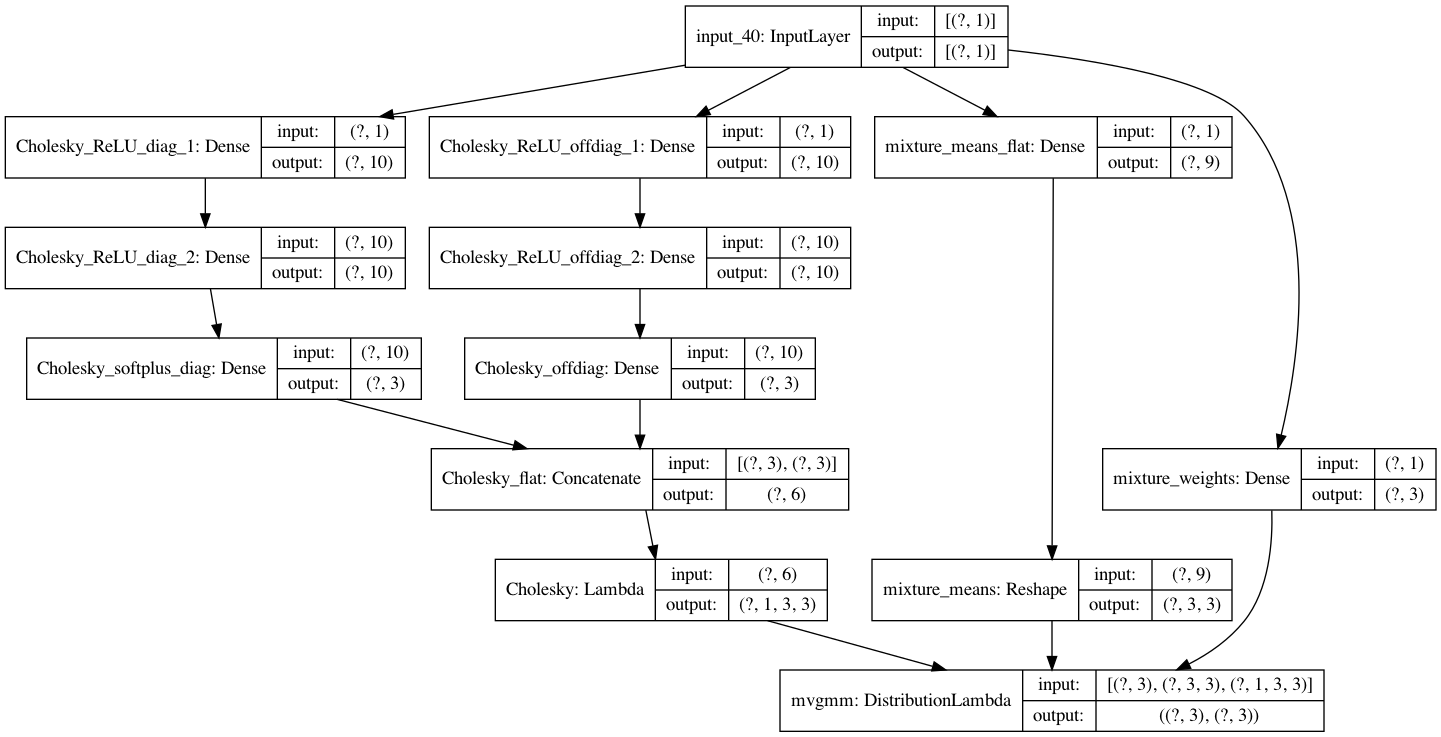

In [103]:
keras.utils.plot_model(model, "tmp.png", show_shapes=True)


In [107]:
negloglik = lambda y, p_y: -p_y.log_prob(y)
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.05), loss=negloglik)
model.fit(x, mm, batch_size=500, epochs=500)#, verbose=False)


Epoch 1/500
3/3 [==============================] - 0s 2ms/step - loss: 4.7862
Epoch 2/500
3/3 [==============================] - 0s 2ms/step - loss: 4.2988
Epoch 3/500
3/3 [==============================] - 0s 2ms/step - loss: 4.6151
Epoch 4/500
3/3 [==============================] - 0s 2ms/step - loss: 4.6178
Epoch 5/500
3/3 [==============================] - 0s 2ms/step - loss: 4.3368
Epoch 6/500
3/3 [==============================] - 0s 2ms/step - loss: 3.9893
Epoch 7/500
3/3 [==============================] - 0s 2ms/step - loss: 3.8518
Epoch 8/500
3/3 [==============================] - 0s 2ms/step - loss: 3.8957
Epoch 9/500
3/3 [==============================] - 0s 2ms/step - loss: 3.8903
Epoch 10/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7909
Epoch 11/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7949
Epoch 12/500
3/3 [==============================] - 0s 2ms/step - loss: 3.8023
Epoch 13/500
3/3 [==============================] - 0s 2ms/st

3/3 [==============================] - 0s 2ms/step - loss: 3.7124
Epoch 105/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7241
Epoch 106/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7150
Epoch 107/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7204
Epoch 108/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7144
Epoch 109/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7137
Epoch 110/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7203
Epoch 111/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7235
Epoch 112/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7259
Epoch 113/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7207
Epoch 114/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7140
Epoch 115/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7164
Epoch 116/500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 3.7262
Epoch 207/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7222
Epoch 208/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7180
Epoch 209/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7122
Epoch 210/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7131
Epoch 211/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7112
Epoch 212/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7092
Epoch 213/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7088
Epoch 214/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7028
Epoch 215/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7048
Epoch 216/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7118
Epoch 217/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7097
Epoch 218/500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 3.7165
Epoch 309/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7256
Epoch 310/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7480
Epoch 311/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7457
Epoch 312/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7244
Epoch 313/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7232
Epoch 314/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7128
Epoch 315/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7208
Epoch 316/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7135
Epoch 317/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7164
Epoch 318/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7240
Epoch 319/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7085
Epoch 320/500
3/3 [==============================] - 0

3/3 [==============================] - 0s 2ms/step - loss: 3.7182
Epoch 411/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7240
Epoch 412/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7269
Epoch 413/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7242
Epoch 414/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7191
Epoch 415/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7371
Epoch 416/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7240
Epoch 417/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7165
Epoch 418/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7165
Epoch 419/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7136
Epoch 420/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7169
Epoch 421/500
3/3 [==============================] - 0s 2ms/step - loss: 3.7110
Epoch 422/500
3/3 [==============================] - 0

In [108]:
mmhat = model.predict(x)
mmhat2 = model.predict(5+0*x)

fig = go.Figure(data=[go.Scatter3d(x=mmhat[:,0], y=mmhat[:,1], z=mmhat[:,2],
                                   mode='markers', marker=dict(size=2)),
                      go.Scatter3d(x=mmhat2[:,0], y=mmhat2[:,1], z=mmhat2[:,2],
                                   mode='markers', marker=dict(size=2))])


fig.show()

# NOTE that THERE ARE *more* *EFFICIENT* (TensorFlow-idiomatic) ways to do what we've just done...
- this was just to build out and see what we were doing step by step...

Notes I made/took to create my questions


## Key Ideas

- The biggest choices in network architecture involve *depth* and *width*
    - Parameters here are called weights ($W$) and biases ($c$): $g(\mathbf{W}^Tx+\mathbf{c})$
        - You'll most likely be using *ReLU*: $max(0, \mathbf{W}^Tx+\mathbf{c})$ 
            - The caption in Figure 6.3 is very interesting and definitely worth reading!
- Nonlinear layer outputs (i.e., activation functions, $g$ above) chained together allow networks to
    - NOT require manual feature engineering $x_1^2$, $x_1\cdot x_2$, etc.
    - NOT rely on predefined generic transformations $\phi$ into high dimensional spaces
        - while these can capture many nonlinearities, they also *very* likely produce a local smootheness behavior...
    - LEARN transformations $\hat \phi$: $\hat \phi(x; \boldsymbol{\theta})^T\mathbf{w}$
        - that can "do feature engineering for you" with an extremely generic transformation capability if we consider a broad class of $\phi(x; \boldsymbol{\theta})$       
        - and only cost "giving up" on optimizing a convex cost function
        - and in choosing the character of the class of $\phi(x; \boldsymbol{\theta})$, the "manual expertise" of the analyst can still influence the score of transformation considered (by just defining the general functional forms, rather than the specific forms used, which is even better actually)
        
## Optimizing FF Networks

- Nonlinearity (usually) means loss of convexity 
    - so linear solvers and convex optimization procedures can't generally be used for FF networks
- Fitting by the gradient, though, is a universally applicable optimization methodology
    - Other ML methodologies could use it but they usually use shortcuts instead
    - but, when the data is large and those shortcuts are not longer computationally tractable, they'll also just use SGD as the universal optimization method it is
- When optimizing non-convex cost functions, there are no "optimum guarantees" from SGD
    - The gradient is followed: and hopefully it this can drive down the cost to a sufficiently low enough value
        - cross-entropy (negative log likelihood of natural probability distribution) is the usual choice for the cost function
            - this is a result of the principle of maximum likelihood which suggests we use $−\log p(y | x; \theta)$ as our cost function: more on this below...        
            - what is needed from a cost function, though, is that the gradient be a good guide: i.e., if it's pretty flat (near 0) then it doesn't help us...
             - negative log likelihood often protects against this happening (it's a log which counteracts exponentiation that happens, e.g., in softmax, which causes saturation)
                 - you do need to be careful, though, that the log likelihood for many models can become arbitrarily good (larger and larger magnitude negative values)
                     - logistic regression doesn't work like this since 0 is the minimum log likelihood value achievable for this model         
    - Initial values matter: FF networks should initialize weights to small values, biases should be small positive initializations, or 0

        

        
        
## Output units

- *linear* units (*affine functions*) don't pose much challenge for gradient based optimization since they don't saturate
- *logistic sigmoid* function (*inverse logit function*) on *affine functions* (which then define the *logit function*)
    - are generally created by normalizinig *exponentiated affine function*
    - but since $\frac{C \exp(z_0)}{C \exp(z_0) + C \exp(z_1)}$ is constant regardless of $C$, $z_0$ is fixed to $0$ and only $z_1$ is used (or only $z_1$ and $z_2$ in the case of three classes, and so on...)
    - For two classes, then, the normalized sigmoid can be expressed as: $\sigma((2y-1)z) = \frac{1}{1+e^{-(2y-1)z}} = \frac{1}{1+e^{-2yz}e^z} = \frac{e^{yz}}{e^{yz}+e^{-yz}e^z} = \frac{e^{yz}}{e^{yz}+e^{(1-y)z}}$
    - and since this defines the likelihood of a Bernoulli distribution, the cross-entropy (negative log likelihood) is: $-log\left( \frac{1}{1+e^{-(2y-1)z}} \right) = log \left(1+e^{-(2y-1)z} \right) = log \left(1+e^{(1-2y)z} \right) = \zeta((1-2y)z) \underset{y=0,z>0}{\overset{y=1, z<0}{\approx}} |z|$ (whenever $z$ is wrong)
        - which is easily differentiated with respect to $z$, and so, again as with identity units, does not pose much challenge for gradient based optimization since it doesn't saturate (and remains informative) when $z$ is wrong
    - On the other hand, the loss function $(y- \hat p)^2$ gets flatter and flatter the closer $\hat p$ is to $1-y$ (i.e., the more wrong $\hat p$ is)
        - thus we always use cross-entropy (as opposed to, e.g., MSE) for sigmoid outputs
    - Also, note that computing should be done with z where possible, as opposed to $\sigma((2y-1)z)$ which can have under/overflow problems.
    
- *softmax* generalizes the *logistic sigmoid* function to more than two classes
    - It provides a continuous and differentiable, i.e., "soft" version, of argmax
    - Since $\log \text{softmax}(z_i) = z_i - \log \sum_j \exp(z_j) \approx z_i - \underset{j}{\max} z_j$
        - if biggest $z_i$ is correct, then these will mostly cancel, and the likelihood will be driven by other incorrect observations
            - i.e., $z_i$ doesn't matter but $\underset{j\not=i}{\max} z_j$ hurts you so it will try to be small
    - $\log$ cost functions are needed to "reverse the saturation" of softmax under exponentiation
    - $\text{softmax}(\mathbf{z}) = \text{softmax}(\mathbf{z} - \underset{j}{\max} z_j)$ is numerically stable
    - If you don't set $z_0=0$ you are technically "overparameterized"; but, this doesn't really seem to matter in practice [unlike indicator varables where it does for multicollinearity in linear modesl (though not for trees)].

## Hidden units

### ReLU

- Often activation functions have undefined derivatives at certain location (e.g., ReLU)
    - in practice this works fine computationally
        - because we're generally following derivatives to reach a minimum (gradient $\mathbf{0}$) but never actually get there
    - so if the derivatives is not defined at those minimums, it does matter -- they're never actually evaluated
    - not to mention numerical representation is inexact, and left and right derivatives are numerically what's used anyway (and those exist)
- While activation functions are currently an active area of research, ReLU $\max\{0,z\}$ is an *excellent* default choice these days
    - ReLU has no second order derivative (i.e., that's 0), and derivative is 1 when it's activated 
        - so ReLU provide a super easy and predictable gradient surface) 
        - and *most IMPORTANTLY* have a ZERO derivative degregation from saturdation when activated
        - the basic story is models with behavior that's more "linear" are easier to fit with gradient descent.
            -  Internal affine weights are generally initialize to a small positive value (like 0.1) so the activation function starts "on" for most observations (and the derivative exists)

- There are some generalized versions of ReLU 
- Performance of choices beyond ReLU is very hard to predict actual performance 
    - it's a very "trial and error" process
    - and often they just work about the same, only occasionally working better than ReLU...
- These generalizations exist because ReLU is flat -- i.e., can't learn -- when it's inactive -- and the generalizations try to address this

    - $\max\{0,z_i\} + \alpha_i \min\{0,z_i\}$
        - *absolute value rectification*: $\alpha_i=-1$ give $|z|$
        - *leaky ReLU*: $\alpha_i \approx 0.01$
        - *Parametric ReLU (PReLU)*: makes $\alpha_i$ learnable
        - *maxout* units: $f(z)_i = \underset{z_j \in \mathbf{z}[(1+gk−k):gk]}{\max} z_j(=(\mathbf{W}^Tx+\mathbf{b})_j)$
            - $k$ $z_j$ are considered for $f(z)_i$ (one for each $z_j \in \mathbf{z}[(1+gk−k):gk]$), and each $z_j$ is a linear function in $x$ (note that $x$ is a scalar)
                - plotting each of these $k$ $z_j$ versus each $x$ (again, $x$ is just a scalar  here) is a bunch of lines over $x$
                - taking the the supremum of these $k$ linear functions makes a piecewise linear function (with $k$ pieces, and which must be convex)
                - since different lines are defined by weights, and the weights are learned, a convex activation function can be learned... larger $k$ means a more flexible piecewise linear function.
            - often more regularization is required to fit maxout activation functions since the activation functions have $2k$ parameters (defined by the weights and biases) (or $k$ parameter vectors when x is not a scalar and the weights become vectors)
            - and since each $z_j$ is considered in multiple $f(z)_i$, there is some redundancy that projects against (*catastropic forgettting*).
            - there are some ways to reduce the number of necessary weights in maxout activation functions

### Others

- Logistic Sigmoid $\sigma(z) = \frac{1}{1+e^{-z}}$ and Hyperbolic Tangent $tanh(z) = 2\sigma(2z) - 1$
    - saturate everywhere except near 0
    - work as an output layer if there's an appropriate cost function to "reverse" the saturation.
    - $tanh(z)$ resembles liner around 0 (unlike $\sigma(z)$ which is not symmetric around 0) if activations are kept small
        - this linearity can be helpful for gradient calculations 
- Others
    - *identity* can be used to do "factor models" first and feeding factors into a network as opposed to all the data
    - *softmax* can provide an internal discrete probability distribution
    - *RBF* provices template matching
        - but RBF saturates for most $x$... so is hard to fit/optimize good models (i.e., calculate gradients) with RBF...
    - *softplus* does not work as well as ReLU in practice... strangely/counter intuititively...
    - *hard tanh* $\max(−1, min(1, z))$ just looks like a "ReLU'd" version of $tanh$
    



    
## Arichtecture

- A singly hidden layer networks can fit data well
- but deeper (chained) networks (with overall less parameters) tend to provide better generalization(!)
    - Deeper networks encode a prior belief in *composition* of features as relevant, i.e., features of varaition are in turn composed of simpler features of variation
        - and this empirically does seem to have improved generalization properties
- The *universal approximation theorem* says: networks with a "squashing" layer (and this result  shown for ReLU as well) and enough hidden units *can* represent any function (and match it's derivatives)
    - although *actually doing this* is another thing
        - *making* the network give a good approximation/representation of a function means actually getting SGD to find "good enough" network weights (in the context of the given architecture and it's activation functions) while not ending up overfitting...
    - And remember: the *no free lunch* theorem says there's no best algorithm to fit the MLP which will generalize the best universally 
    - And also *notice* that: depending on how complex the function it the number of required hidden units this *"can do it"* can actually become intractible...
    
                
## Back propegation 
- FF networks forward propegate data to a cost function
- Effects of changes to the parameters (gradients) to how incoming x effects the cost function can be found by going the opposite way with "backprop"
- *Backprop* just computes gradients of parameters with respect to the cost function
- Following the gradient (e.g., by SGD) is the *optimzation* procedure
- Gradients are computed using the *chain rule* $\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y}\frac{\partial y}{\partial x}$
    - 6.45/6 show vector generalizations
    - 6.47 shows shows tensor generalizations

## Symbolic Representation of Computational Graphs
- Computational graphs can be formally defined as in figure 6.8
    - these are *symbolic representation*
    - Torch/Caffe take a symbolic representations and inputs and produce *symbol-to-number diﬀerentiation*, i.e., the derivatives for these numbers (extended graph is just never exposed)
    - Theano/Tensorflow add nodes to the computational graph which will produce the gradients (e.g., 6.10)
        - higher order derivativs can be calculated as derivatives on the graph with derivatives    
- *Backpropegation* can be defined by a computational graph:
    - This amounts to visiting each edge in a FF network, computing the partial derivative of the next node with respect to the current node; and dot producting that result to the partial derivatives leading into the current node to extend those partial derivatives to the previous nodes (by the *chain rule*)
    - since many expressions depend on the same evaluations, table filling -- called *dynamic programming* -- is used, which will lead to a $O(n^2)$ rather than exponential computational demands 
        - and, actually, given that the usual architecture in a FF network is "chain structure", the computational demand with this appraoch is frequently even less than $O(n^2)$.
    



## From your reading, you should know/be aware of the following:

- The `xor` was used to show that (single layer) perceptrons had limited representational capacity

- Deep networks with only *linear activation functions* can be reduced to a single layer network representing a linear model
    - thus we must use "an affine transformation controlled by learned parameters, followed by a ﬁxed nonlinear function called an activation function"

- Using *calculus of variations*, cost functions can be interpreted as *functionals* (mapping functions to real values)
    - so $f(\textbf{x})$ estimating $E[y|\textbf{x}]$ is found using mean squared error
    - and $f(\textbf{x})$ estimating $median[y|\textbf{x}]$ is found using mean absolute error
    
- We will later see alternative architectures beyond just chained FF networks (at various depths)
    - E.g., CNNs to share parameters, and skip connections to improve gradient flow
    - Parameter reduction though clever re-use can be an important "architecture consideration"
        - e.g., as is done with CNNs and can be done in some inistances with (learned) maxout activation functions

- Backprop is just an algorithm (with recipes given in 6.5.3/4/6/7) that can be computed 
    - in $O(n^2)$ time for $n$ the number of edges in a FF network (and constant time derivatives evaluation)
    - or better (e.g., in settings such as 6.57) when algebraic/mathematical simplifications can be made.
    - This is because it's a general *automatic differentiation* algorithm (a special case of the *reverse mode accumulation* class of algorithms)    
    
- As noted in Section "6.5.8 Complications", there are *many* practical considerations in play when it comes to actual computational implementations of backprop algorithms.  

- Backprop is not the only way to go about computing gradients; but, is generally sufficiently effective within the deep learning community so as to make it the "tool of choice" with a very dominant "market share" in the deep learning context.

- There are some things called *Krylov methods* which allow for computationally feasible approximiate computations involving the Hessian: those are called *Krylov methods*

- The Historical context of FF networks and MLP as narrated in Section 6.6, particularly the takeaway message that FF networks and MLP are the current state of the art solution of the culmination of efforts to produce general and effective function estimation methodology (and are so effective that they are becoming integral tools enabling *other* tools as foundational underlying subcomponents of those methodologies)

- FF networks are function estimation methodologies (Section 6.4.1 Universal Approximation Properties and Depth)
    - in terms of function representation, there are results that show expoenential power in representation as a result of depth. 



